# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-10 15:59:31.972745: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 15:59:31.976206: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 15:59:32.007242: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 15:59:32.695964: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 6000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5: accuracy 10.100%
Epoch 2/5: accuracy 9.133%
Epoch 3/5: accuracy 9.683%
Epoch 4/5: accuracy 9.683%
Epoch 5/5: accuracy 9.683%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[-1  1  1 ... -1  1 -1]
 [-1 -1 -1 ... -1 -2  2]] ...

 [[-1  1  1 ... -1  1 -1]
 [ 1  2  2 ...  1 -1 -1]
 [-2 -1 -2 ... -1 -1  2]
 ...
 [-1 -1  1 ... -2 -1  1]
 [-1  1 -2 ...  1  1 -1]
 [ 1 -1  1 ...  1  1  2]]

 [[ 2  2 -2 -2  2 -2 -2  2  2  2 -2  2  2 -2 -2  2 -2 -2  2  2  2  2  2  2
  -2  2  2 -2  2 -2  2 -2 -2  2  2  2 -2 -2 -2 -2 -2 -2 -2 -2 -2  2 -2 -2
   2  2 -2 -2  2  2  2  2  2  2 -2 -2 -2 -2 -2  2 -2 -2  2 -2 -2 -2 -2  2
  -2 -2  2  2 -2 -2  2 -2 -2 -2 -2  2  2 -2  2  2 -2 -2 -2 -2 -2  2  2 -2
  -2 -2  2  2  2 -2 -2 -2 -2 -2 -2 -2 -2  2 -2 -2 -2 -2 -2 -2 -2 -2 -2  2
   2 -2 -2 -2  2 -2 -2 -2]
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2 -2  2  2 -2  2 -2 -2 -2 -2 -2  2
  -2 -2  2 -2  2 -2 -2  2  2 -2 -2 -2  2  2  2  2  2 -2  2  2 -2  2 -2  2
   2  2  2 -2  2  2 -2  2  2 -2  2 -2  2 -2 -2 -2 -2 -2  2 -2  2  2  2  2
   2  2 -2  2 -2 -2  2  2 -2  2  2 -2  2  2  2 -2 -2 -2  2  2 -2  2  2  2
   2 -2 -2 -2 -2 -2  2 -2 -2 -2  2  2 -2  2  2 -2  2  2  2 -2  2 -2 -2  2
   2  2 -2  2 -2


 [ 0  0  0 10 15  0 43 34  0 10  9 15 60 32  0 19  0  0  0  0  0  8 36  0
  0 36  6  0  0 30  3  0 45  0  5  0  0 20  0 49  0  0  0  0  0 51  0  0
  0  0  0  0  0  0  0 31 29 29  3  0  0  0  3 14  3  0  0  0  8  6  0 19
  0 18  0 43 51  0 22  0  0 36  0 50 35 77  0 25 43  0 15  0  0  0 80  0
 15  5  0 38 54 69  0  5 65  4  3 18  0  0 46 13  0  0  0 25  0 49 36  0
  0  0  1 12 12  0 32  0]


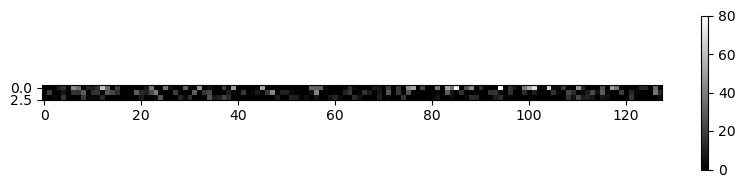


 [ 0  0 39 39  0 39 39 39 39 34]


In [8]:
plt.figure(figsize = (10,2))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar()
print("\n", model.last_intermediate_outputs[0])
plt.show()
print("\n", model.last_outputs)